### Question 1

#### First Part:
* Sampling 40 points from 1d gaussian and assinging 20 as x and 20 as y coordinates

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
prob=[.33,.33,.33]
def generate(mean,var,n):
    return (np.random.normal(i,var,20))

In [4]:
mean=[2,4,6]

In [5]:
mean

[2, 4, 6]

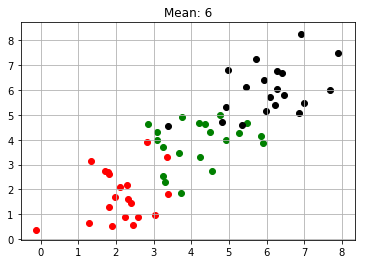

In [21]:
x_data=[]
y_data=[]
plt.subplots()
c='rgk'
index=0
for i in mean:
    mu=i
    sigma=1
    x=generate(i,1,20)
    y=generate(i,1,20)
    plt.grid()
    plt.scatter(x,y,color=c[index])
    plt.title("Mean: "+str(i))
    x_data.extend(x)
    y_data.extend(y)
    index+=1
plt.show()


In [22]:
data1=pd.DataFrame({'X':x_data,'Y':y_data})

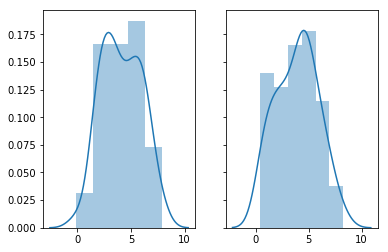

In [23]:
import seaborn as sns
plt.figure(figsize=(10,10))
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.distplot(x_data, ax=ax1)
sns.distplot(y_data, ax=ax2)
plt.show()

* Kind of looks bimodal as more points lie between 2 and 4 plus also 4 and 6

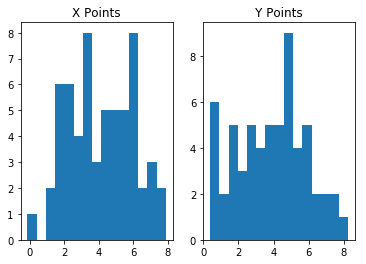

In [24]:
plt.subplot(1,2,1)
plt.hist(x_data,bins=15)
plt.title("X Points")
#plt.show()
plt.subplot(1,2,2)
plt.hist(y_data,bins=15)
plt.title("Y Points")
plt.show()

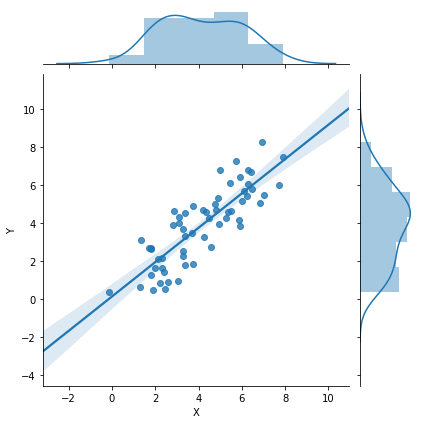

In [25]:
g = sns.JointGrid(x='X', y='Y', data=data1)
g = g.plot(sns.regplot, sns.distplot)
plt.show()

* This plot shows distribution of x and y on respective axis
* Also presents the scatter plot of points based on (x,y) coordinates

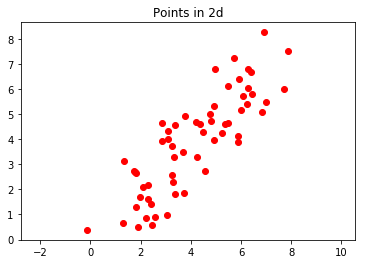

In [26]:
plt.plot(x_data,y_data,'ro')
plt.axis('equal')
plt.title("Points in 2d")
plt.show()

In [27]:
data1.head()

,X,Y
0,2.313798,1.627273
1,1.822514,2.631942
2,-0.116397,0.383581
3,3.350654,3.308992
4,1.887250,0.512962


In [28]:
data1.shape

(60, 2)

### Question 2

In [29]:
from sklearn.neighbors import NearestNeighbors

In [30]:
neighbors1=NearestNeighbors(n_neighbors=5,metric='euclidean')

In [31]:
neighbors1.fit(data1)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [32]:
distance1,indices1=neighbors1.kneighbors(data1)

In [33]:
def connectPoints(d,indices,func,part):
    xPts=[]
    yPts=[]
    
    plt.figure(figsize=(10,10))
    #plt.subplots(211)
    for i in range(len(indices)):
        index=indices[i][0]
        xPts.append(d.iloc[index].X)
        yPts.append(d.iloc[index].Y)   
        
    points=[ [] for i in range(len(indices)) ]
    
    for i in range(len(indices)):
        pts=[]
        for j in range(1,len(indices[i])):
            index=indices[i][j]
            pts.append([d.iloc[index].X,d.iloc[index].Y])
        points[i]=pts
    
    for i in range(len(xPts)):
        x1 = xPts[i]
        y1 = yPts[i]
        plt.plot(x1, y1, 'bo')
        plt.text(x1 * (1 + 0.01), y1 * (1 + 0.01) , i, fontsize=12)

    plt.scatter(xPts,yPts,s=120)
    
    for i in range(len(xPts)):
        x1,y1=(xPts[i],yPts[i])
        for j in range(len(points[i])):#len(points[i])):
            x2,y2=(points[i][j][0],points[i][j][1])
            plt.plot([x1,x2],[y1,y2],'k-') 
    
    plt.title("Similarity Graph using "+func+"from data of "+part)
    plt.show()

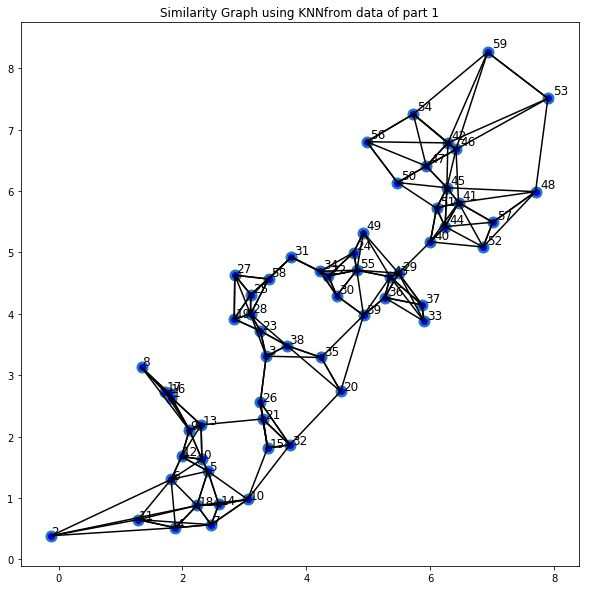

In [34]:
connectPoints(data1,indices1,"KNN","part 1")

In [35]:
indices1[:5]

array([[ 0,  5, 12,  9, 13],
       [ 1, 16, 17,  9, 13],
       [ 2, 11,  4,  6, 18],
       [ 3, 38, 23, 28, 26],
       [ 4, 18,  7, 11,  6]], dtype=int64)

In [36]:
mat1=neighbors1.kneighbors_graph(data1)
mat1.toarray()

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

#### Using Gaussian Similarity

* First I will define the metric function to be used here

In [621]:
def connectPoints2(d,indices,func,part):
    xPts=[]
    yPts=[]
    
    plt.figure(figsize=(10,10))
    #plt.subplots(211)
    for i in range(len(indices)):
        index=i
        xPts.append(d.iloc[index].X)
        yPts.append(d.iloc[index].Y)       
    points=[ [] for i in range(len(indices)) ]
    
    for i in range(len(indices)):
        pts=[]
        for j in range(len(indices[i])):
            index=indices[i][j]
            pts.append([d.iloc[index].X,d.iloc[index].Y])
        points[i]=pts
    
    for i in range(len(xPts)):
        x1 = xPts[i]
        y1 = yPts[i]
        plt.plot(x1, y1, 'bo')
        plt.text(x1 * (1 + 0.01), y1 * (1 + 0.01) , i, fontsize=12)

    plt.scatter(xPts,yPts,s=120)
    
    for i in range(len(xPts)):
        x1,y1=(xPts[i],yPts[i])
        for j in range(len(points[i])):#len(points[i])):
            x2,y2=(points[i][j][0],points[i][j][1])
            plt.plot([x1,x2],[y1,y2],'k-') 
    
    plt.title("Similarity Graph using "+func+"from data of "+part)
    plt.show()

In [745]:
import collections
import heapq
def KNN(data):
    neighbor2Index=collections.defaultdict(list)
    for i in range(len(data)):
        x=data.iloc[i][0]
        y=data.iloc[i][1]
        dist2Index=collections.defaultdict(list)
        for j in range(len(data)):
            x1=data.iloc[j][0]
            y1=data.iloc[j][1]
            dist=computeDist(np.asarray([x,y]),np.asarray([x1,y1]))
            dist2Index[dist].append(j)   
            
        h1=list(dist2Index.keys())
        heapq.heapify(h1)
        k=5
        while(True):
            temp=heapq.heappop(h1)
            if temp==0:
                continue
            if len(dist2Index[temp])>k:
                neighbor2Index[i].extend(dist2Index[temp][:k])
                break
            else:
                k-=len(dist2Index[temp])
                neighbor2Index[i].extend(dist2Index[temp]) 
            if k<=-1 or not h1:
                break
    return neighbor2Index            

In [746]:
#res=KNN(pd.DataFrame([[1,2],[4,4],[6,6],[8,8],[3,3],[5,5]]))
res=KNN(data1)

In [747]:
from sklearn.neighbors.dist_metrics import PyFuncDistance
count=0
def computeDist(x1,x2):
    dist = np.linalg.norm(x1-x2)
    res=np.exp(-dist**2/2*1)
    return res

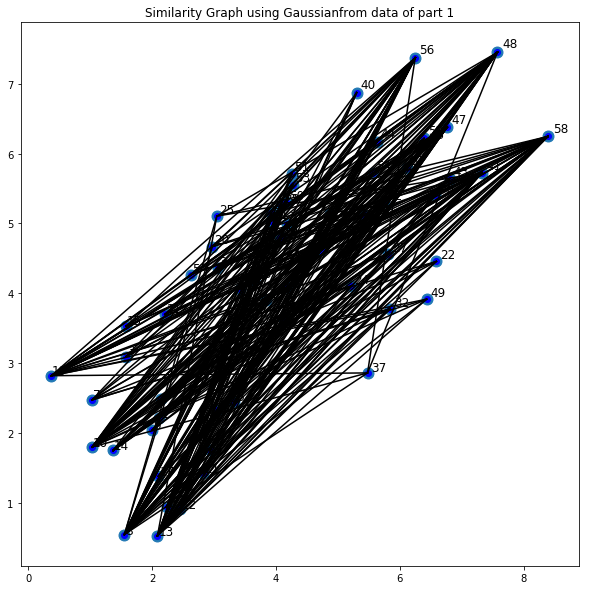

In [748]:
connectPoints2(data1,res,"Gaussian","part 1")

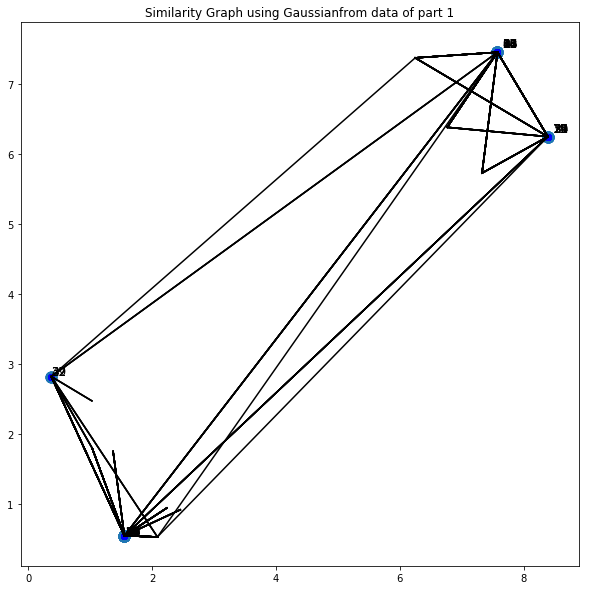

In [715]:
neighbors4=NearestNeighbors(n_neighbors=5,metric=computeDist)
neighbors4.fit(data1)
distance4,indices4=neighbors4.kneighbors(data1)
connectPoints(data1,indices4,"Gaussian","part 1")

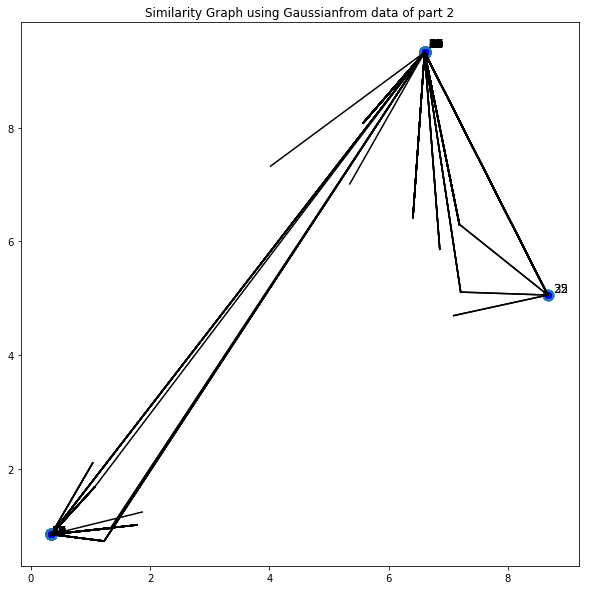

In [716]:
neighbors5=NearestNeighbors(n_neighbors=5,metric=computeDist)
neighbors5.fit(data2C1)
distance5,indices5=neighbors5.kneighbors(data2C1)
connectPoints(data2C1,indices5,"Gaussian","part 2")

### Question 3

In [37]:
mat1=neighbors1.kneighbors_graph(data1)
mat1.toarray()

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [38]:
weights,vectors=np.linalg.eig(mat1.toarray())

In [39]:
axis_x=[i for i in range(len(mat1.toarray()))]

C:\Users\Siddharth\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


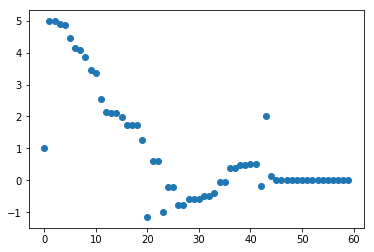

In [40]:
plt.scatter(axis_x,weights)
plt.show()

In [41]:
mat2=neighbors2.kneighbors_graph(data2C1)
weights2,vectors2=np.linalg.eig(mat2.toarray())
axis_x2=[i for i in range(len(mat2.toarray()))]
plt.scatter(axis_x2,weights2)
plt.show()

NameError: name 'neighbors2' is not defined

### Question 4

In [42]:
from sklearn.cluster import KMeans

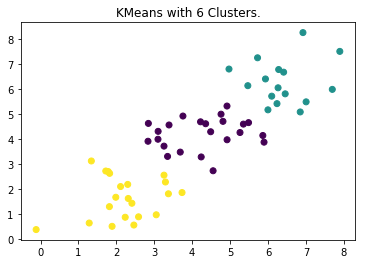

In [43]:
kMModel=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=400)
kmeans=kMModel.fit(data1)
plt.figure()
plt.scatter(data1.X,data1.Y,c=kmeans.labels_)
plt.title("KMeans with "+str(i)+" Clusters.")
plt.show()